In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurar semilla para reproducibilidad
np.random.seed(42)

In [3]:
# Parámetros
lambda_poisson = 1
media_gamma = 2000000
desv_std_gamma = 1000000

In [4]:
# Calcular parámetros de la distribución Gamma
# Para Gamma: media = alpha * beta y varianza = alpha * beta^2
# Por lo tanto: alpha = (media^2) / varianza y beta = varianza / media
alpha = (media_gamma ** 2) / (desv_std_gamma ** 2)
beta = (desv_std_gamma ** 2) / media_gamma

In [5]:
# Número de simulaciones
num_simulaciones = 500

In [12]:
# Almacenar resultados
costos_totales = []  # Inicializar como lista de Python, no como array NumPy

# Realizar simulación Monte Carlo
for _ in range(num_simulaciones):
    # Simular número de siniestros (distribución de Poisson)
    num_siniestros = np.random.poisson(lambda_poisson)

    # Simular severidad de cada siniestro (distribución Gamma)
    if num_siniestros > 0:
        severidades = np.random.gamma(alpha, beta, num_siniestros)
        costo_total = np.sum(severidades)
    else:
        costo_total = 0

    costos_totales.append(costo_total)  # Asegúrate de que esta línea esté correctamente indentada

# Luego de completar el bucle, convertir a array de numpy
costos_totales = np.array(costos_totales)

In [13]:
# Convertir a array de numpy
costos_totales = np.array(costos_totales)

In [14]:
# Análisis de resultados
media_simulada = np.mean(costos_totales)
mediana_simulada = np.median(costos_totales)
desv_std_simulada = np.std(costos_totales)
percentil_95 = np.percentile(costos_totales, 95)
percentil_99 = np.percentile(costos_totales, 99)

In [15]:
# Calcular VaR y TVaR
var_95 = np.percentile(costos_totales, 95)
indices_mayores_var = costos_totales > var_95
tvar_95 = np.mean(costos_totales[indices_mayores_var])

In [24]:
# Mostrar resultados
print(f"Resultados de la simulación para {num_simulaciones} escenarios:")
print(f"Costo medio: {media_simulada:.2f}")
print(f"Costo mediana: {mediana_simulada:.2f}")
print(f"Desviación estándar: {desv_std_simulada:.2f}")
print(f"Percentil 95% (VaR 95%): {percentil_95:.2f}")
print(f"Percentil 99%: {percentil_99:.2f}")
print(f"TVaR 95%: {tvar_95:.2f}")

Resultados de la simulación para 500 escenarios:
Costo medio: 2062867.42
Costo mediana: 1435574.95
Desviación estándar: 2319138.46
Percentil 95% (VaR 95%): 6561102.35
Percentil 99%: 9734948.21
TVaR 95%: 8434413.82


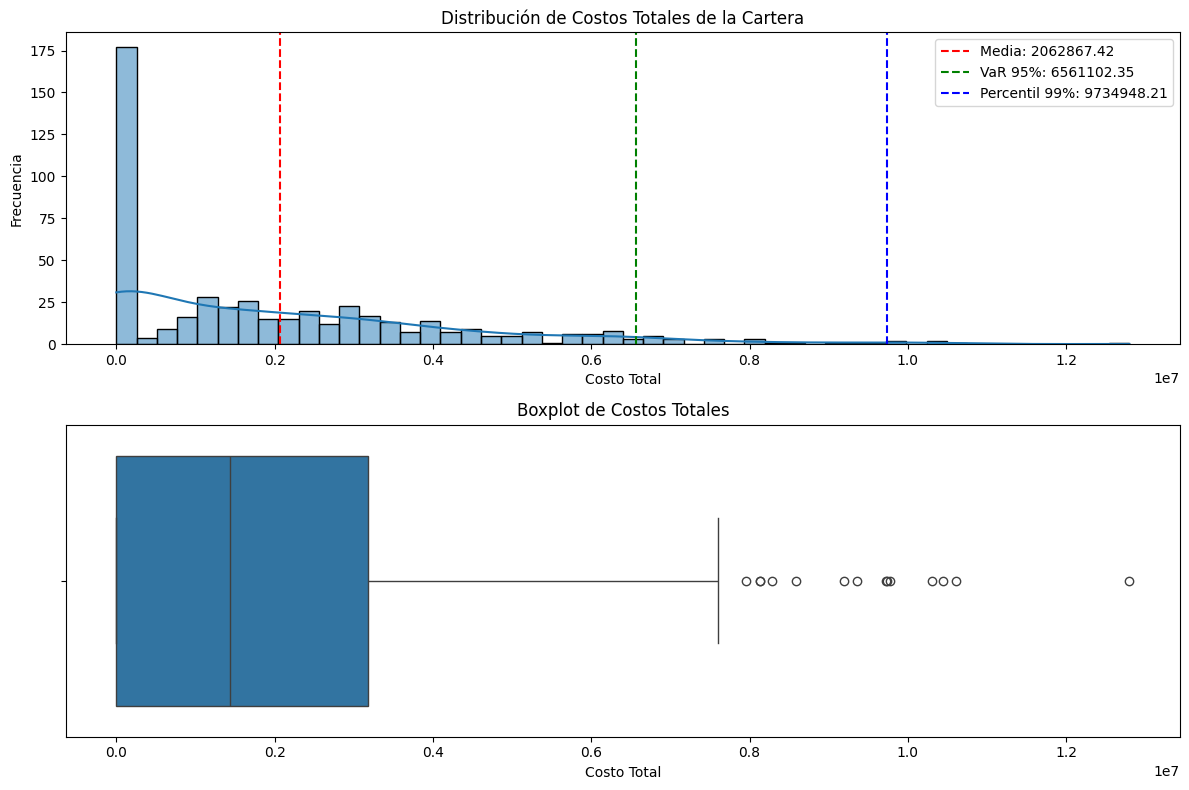

In [23]:
# Visualización
plt.figure(figsize=(12, 8))

# Histograma
plt.subplot(2, 1, 1)
sns.histplot(costos_totales, kde=True, bins=50)
plt.axvline(media_simulada, color='r', linestyle='--', label=f'Media: {media_simulada:.2f}')
plt.axvline(percentil_95, color='g', linestyle='--', label=f'VaR 95%: {percentil_95:.2f}')
plt.axvline(percentil_99, color='b', linestyle='--', label=f'Percentil 99%: {percentil_99:.2f}')
plt.title('Distribución de Costos Totales de la Cartera')
plt.xlabel('Costo Total')
plt.ylabel('Frecuencia')
plt.legend()

# Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=costos_totales)
plt.title('Boxplot de Costos Totales')
plt.xlabel('Costo Total')
plt.tight_layout()

# Mostrar el gráfico (importante)
plt.show()

In [20]:
umbral_1 = 2000000
umbral_2 = 5000000
umbral_3 = 10000000

prob_exceder_1 = np.mean(costos_totales > umbral_1) * 100
prob_exceder_2 = np.mean(costos_totales > umbral_2) * 100
prob_exceder_3 = np.mean(costos_totales > umbral_3) * 100

print(f"\nProbabilidades de exceder umbrales:")
print(f"Probabilidad de exceder {umbral_1:.0f}: {prob_exceder_1:.2f}%")
print(f"Probabilidad de exceder {umbral_2:.0f}: {prob_exceder_2:.2f}%")
print(f"Probabilidad de exceder {umbral_3:.0f}: {prob_exceder_3:.2f}%")


Probabilidades de exceder umbrales:
Probabilidad de exceder 2000000: 41.20%
Probabilidad de exceder 5000000: 11.40%
Probabilidad de exceder 10000000: 0.80%
